## Analyzing Atrato's Portuguese Migrants 🇵🇹

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_excel('atrato-data.xlsx')
df = df[df.nationality=="Portuguese"]

### Demographics

In [3]:
display("Total of Portuguese migrants:{}".format(len(df)))

'Total of Portuguese migrants:199'

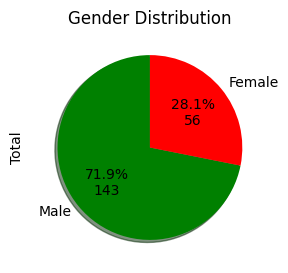

In [4]:
gender = df["gender"].to_frame("Gender").value_counts().to_frame("Total")
gender.plot.pie(title="Gender Distribution", figsize=(3,3), colors = ['green','red'],
                autopct=(lambda prct_value: '{:.1f}%\n{:.0f}'.format(prct_value,len(df)*prct_value/100)),
                shadow=True, startangle=90, labels=["Male","Female"], y='Total').get_legend().remove()

### Travel

In [5]:
distritos_geodata = gpd.read_file("distritos.geojson")
distritos_data = pd.read_csv("distritos_passaportes.csv", converters={'DI': str})

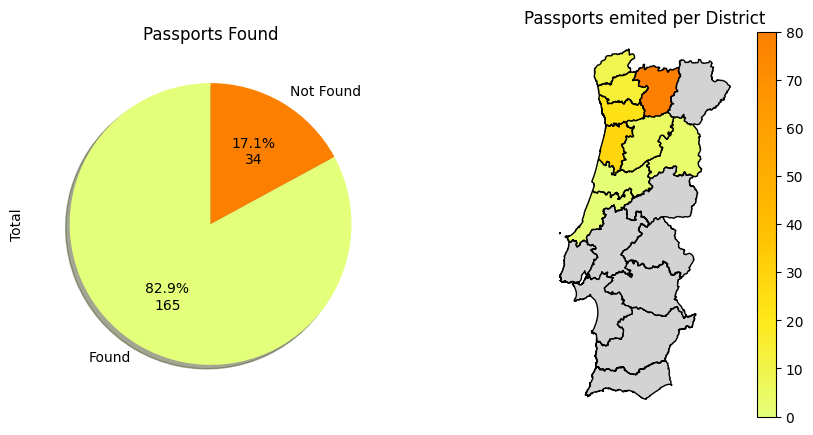

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
DI,01,02,03,04,05,06,07,08,09,10,11,12,13,14,15,16,17,18
distrito,Aveiro,Beja,Braga,Bragança,Castelo Branco,Coimbra,Évora,Faro,Guarda,Leria,Lisboa,Portalegre,Porto,Santarém,Setúbal,Viana do Castelo,Vila Real,Viseu
n_passaportes,29,<NA>,14,<NA>,<NA>,1,<NA>,<NA>,3,1,<NA>,<NA>,23,<NA>,<NA>,9,81,5


In [6]:
fig, axes = plt.subplots(ncols=2)

passport = df["found_passport"].to_frame("Passports Found").value_counts().to_frame("Total")
passport.plot.pie(title="Passports Found", figsize=(10,5), cmap='Wistia',ax=axes[0],
                autopct=(lambda prct_value: '{:.1f}%\n{:.0f}'.format(prct_value,len(df)*prct_value/100)),
                shadow=True, startangle=90, labels=["Found","Not Found"], y='Total').get_legend().remove()
plt.title("Passports emited per District")
distritos_map = distritos_geodata.merge(distritos_data, on="DI")
distritos_map = distritos_map[["DI","distrito", "geometry", "n_passaportes"]]
distritos_map.plot(column = "n_passaportes",cmap='Wistia',figsize=(15,16), vmax=80, vmin=0, ax=axes[1],
                   legend=True, edgecolor="black", missing_kwds= dict(color = "lightgrey",))
plt.axis('off')
plt.show()

dd = distritos_data.copy()
dd["n_passaportes"]=dd["n_passaportes"].astype("Int64")
display(dd.T)